In [18]:
import praw
import pandas as pd
from datetime import datetime, timedelta
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as pdt
import mysql.connector
import re
from tqdm import tqdm

In [2]:
db_connection = mysql.connector.connect(
  host= "wp.jagi.wtf",
  user= "redditu",
  password= "redditMaster",
  database="reddit"
  )

In [3]:
cursor = db_connection.cursor()

In [4]:
dfru = pd.read_sql("SELECT * FROM users", db_connection)

# Erfahrung der Reddituser, die in die Top Posts gekommen sind

In [ ]:
dfru["created"] = pd.to_datetime(dfru["created_utc"], unit='s') 
dfru["time_since_creation"] = (datetime.now() - dfru["created"]) 
dfru["years_since_creation"] = dfru["time_since_creation"].dt.days/365

/home/jakob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


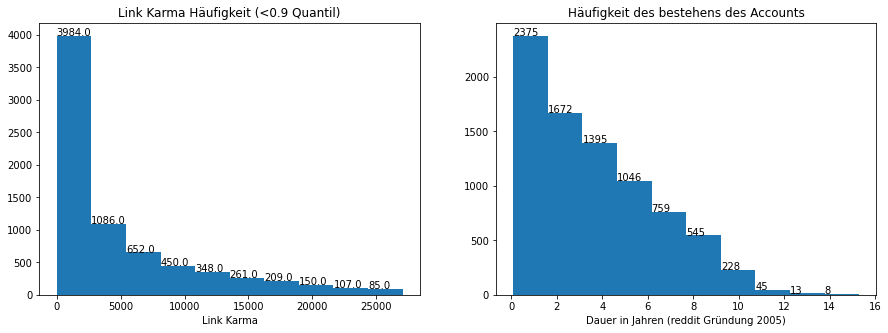

In [44]:
my_bins = 10

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

arr = ax1.hist(dfru[dfru["link_karma"]<dfru["link_karma"].quantile(0.9)]["link_karma"], bins=my_bins)
ax1.set_title("Link Karma Häufigkeit (<0.9 Quantil)")
ax1.set_xlabel("Link Karma")
for i in range(my_bins):
    ax1.text(arr[1][i],arr[0][i],str(arr[0][i]))


arr = ax2.hist(dfru[dfru["years_since_creation"]<20]["years_since_creation"], bins=my_bins)
ax2.set_title("Häufigkeit des bestehens des Accounts")
ax2.set_xlabel("Dauer in Jahren (reddit Gründung 2005)")
for i in range(my_bins):
    ax2.text(arr[1][i],arr[0][i],str(int(arr[0][i])))
    

fig.show()

# Mods 

/home/jakob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


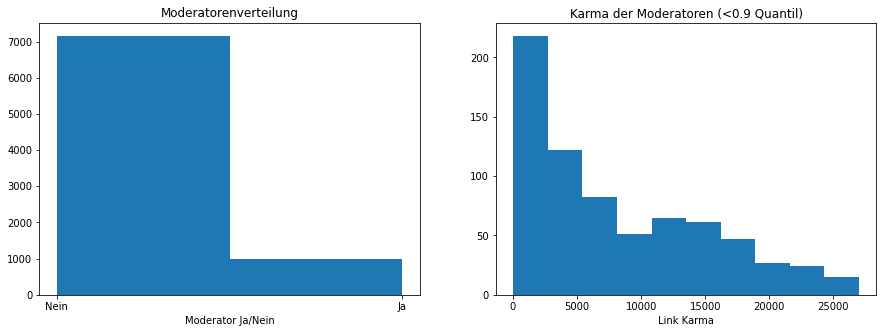

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.hist(dfru["is_mod"], 2)
ax1.set_xlabel("Moderator Ja/Nein")
ax1.set_xticks([0,1])
ax1.set_xticklabels(["Nein", "Ja"])
ax1.set_title("Moderatorenverteilung")

ax2.hist(dfru[(dfru["is_mod"]==1)& (dfru["link_karma"]< dfru["link_karma"].quantile(0.9))]["link_karma"])
ax2.set_xlabel("Link Karma")
ax2.set_title("Karma der Moderatoren (<0.9 Quantil)")

fig.show()